### Operacje kontekstowe

Ogólna formuła filtracji opiera się na następującym schemacie wykorzystującym splot (konwolucję):

### $I_{out} = \sum_{i, j \in jądro} k_{i,j} \cdot I_{in}(x+i, y+j)$

Najprostszą formą tak rozumianego filtru jest przekształcenie wykorzystujące jądra liniowe. Oznacza to, że nowa wartość punktu może być wyrażona jako suma ważona punktów jego otoczenia.

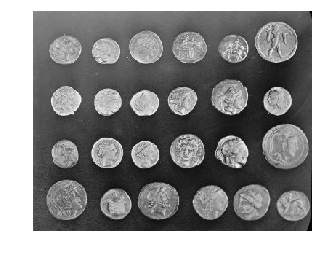

In [10]:
from skimage import data
import matplotlib.pyplot as plt

im = data.coins()

plt.figure(figsize=(5,5))
plt.imshow(im, cmap="gray")
plt.axis('off')
plt.show()

In [11]:
def show2imgs(im1, im2, title1='Obraz pierwszy', title2='Obraz drugi', size=(10,10)):

    f, (ax1, ax2) = plt.subplots(1,2, figsize=size)
    ax1.imshow(im1, cmap='gray')
    ax1.axis('off')
    ax1.set_title(title1)

    ax2.imshow(im2, cmap='gray')
    ax2.axis('off')
    ax2.set_title(title2)
    plt.show()

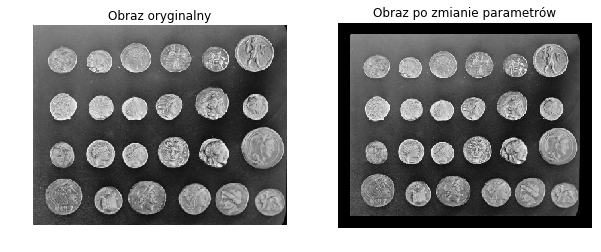

In [12]:
import cv2

size = 20
border = cv2.copyMakeBorder(im, size, size, size, size, cv2.BORDER_CONSTANT, 255)

show2imgs(im, border, title1='Obraz oryginalny', title2='Obraz po zmianie parametrów', size=(10,10))

Dostępne mechanizmy replikacji są opisane w [dokumentacji](https://docs.opencv.org/3.0-rc1/d2/de8/group__core__array.html#ga209f2f4869e304c82d07739337eae7c5).

#### Filtr prostokątny (dolnoprzepustowy)

Maska filtru inaczej jądro (ang. kernel):

$\begin{bmatrix} 1&1&1\\1&1&1\\1&1&1\end{bmatrix}$

(303, 384) float64
(303, 384) uint8


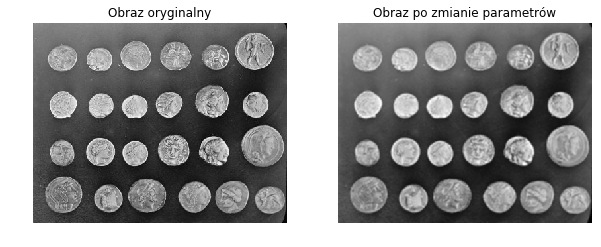

In [13]:
import warnings
warnings.filterwarnings('ignore')

from skimage import img_as_float, img_as_ubyte

imf = img_as_float(im)
print(imf.shape, imf.dtype)

imf = img_as_ubyte(imf)
print(imf.shape, imf.dtype)

bimf = cv2.blur(imf,  (3,3))

show2imgs(imf, bimf, title1='Obraz oryginalny', title2='Obraz po zmianie parametrów', size=(10,10))

#### Filtr prostokątny znormalizowany

Maska filtru inaczej jądro (ang. kernel):

$\frac{1}{9} \times \begin{bmatrix} 1&1&1\\1&1&1\\1&1&1\end{bmatrix}$

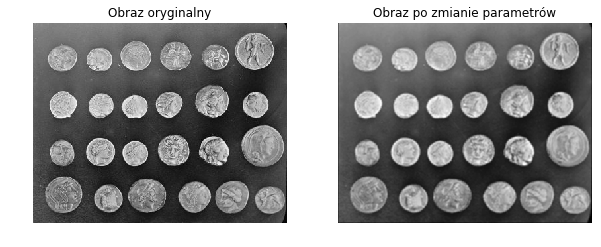

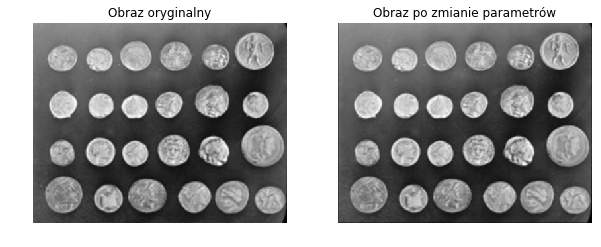

uint8 uint8
0.9882253850385039


In [22]:
bfimf = cv2.boxFilter(imf,  ddepth=cv2.CV_8U, ksize=(3,3), normalize=True, borderType=cv2.BORDER_CONSTANT)

show2imgs(imf, bfimf, title1='Obraz oryginalny', title2='Obraz po zmianie parametrów', size=(10,10))


# Porównanie rezultatów
show2imgs(bimf, bfimf, title1='Obraz oryginalny', title2='Obraz po zmianie parametrów', size=(10,10))

# Sprawdzenie identyczności
import numpy as np
print(bimf.dtype, bfimf.dtype)
print(np.mean(bimf == bfimf))

#### Rozmycie gaussowskie

Maska filtru inaczej jądro (ang. kernel):

$\frac{1}{141} \times \begin{bmatrix} 1&4&4&4&1\\7&26&41&26&7\\1&4&4&4&1\end{bmatrix}$

dla $ksize=(5,3)$, $sigmaX=1.0$ i $sigmaY=0.5$.

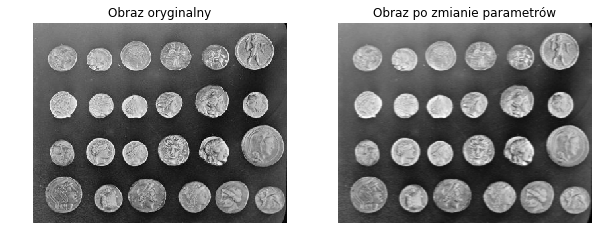

(303, 384) uint8


In [15]:
gbimf = cv2.GaussianBlur(imf,  ksize=(5,3), sigmaX=1.0, sigmaY=.5)

show2imgs(imf, gbimf, title1='Obraz oryginalny', title2='Obraz po zmianie parametrów', size=(10,10))

print(gbimf.shape, gbimf.dtype)

#### Filtr medianowy

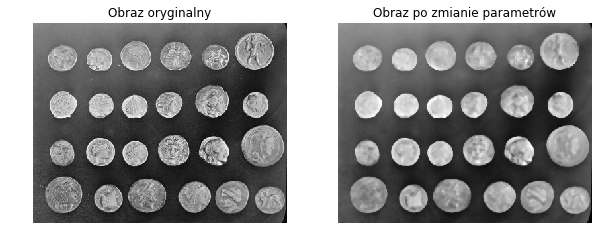

In [16]:
mbimf = cv2.medianBlur(imf,  5)

show2imgs(imf, mbimf, title1='Obraz oryginalny', title2='Obraz po zmianie parametrów', size=(10,10))

#### Filtr bilateralny

Podobnie jak filtr gaussowski oblicza on średnią ważoną każdego pikspela i otaczających go punktów. Wykorzystuje przy tym dwa współczynniki rozmycia. Pierwszy taki sam jak w wygładzaniu Gaussa. Drugi zależy nie od odległości piskeli sąsiadujących od punktu centralnego, ale od równicy intensywności (luminancji) względem punktu centralnego.

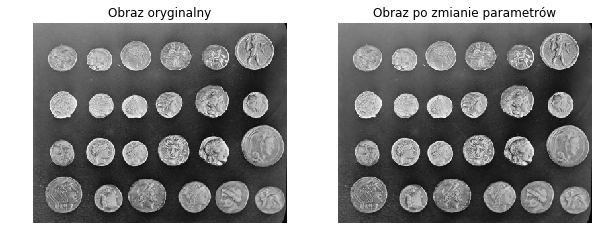

In [17]:
sigmaColor = 2.0
sigmaSpace = 3.0

bfimf = cv2.bilateralFilter(imf,  5, sigmaColor, sigmaSpace)
show2imgs(imf, bfimf, title1='Obraz oryginalny', title2='Obraz po zmianie parametrów', size=(10,10))

#### Filtry z niestandardowymi (definiowanymi) maskami

Maska filtru: 
 [[1 2 1]
 [2 4 2]
 [1 2 1]]


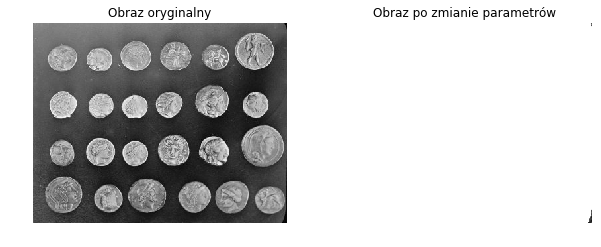

In [18]:
kernel = np.array([[1,2,1],[2,4,2],[1,2,1]])
nfimf = cv2.filter2D(imf,  ddepth=-1, kernel=kernel)

print('Maska filtru: \n', kernel)
show2imgs(imf, nfimf, title1='Obraz oryginalny', title2='Obraz po zmianie parametrów', size=(10,10))